定义：高频客户：frequency ≥ 4，低频客户：frequency ≤ 2

原假设：高频客户与低频客户的平均订单金额没有差异 \
备择假设：高频客户的平均订单金额更高


In [ ]:
#导入必备库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
#数据读取
df = pd.read_csv("/Users/eric/ecommerce_sql_project/data/order_test_data.csv")

df.head()

,CustomerID,order_value,frequency
0,17850,139.12,34
1,17850,22.20,34
2,13047,278.73,10
3,13047,70.05,10
4,13047,17.85,10


In [8]:
#按照定义分组
high_freq = df[df['frequency'] >= 4]['order_value']
low_freq = df[df['frequency'] <= 2]['order_value']

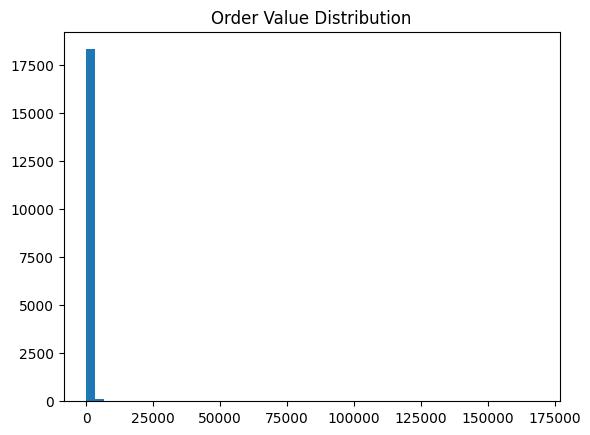

In [9]:
#查看订单分布情况
plt.figure()
plt.hist(df['order_value'], bins=50)
plt.title("Order Value Distribution")
plt.show()

发现严重右偏

In [ ]:
#对数转换 避免偏态影响
high_log = np.log1p(high_freq)
low_log = np.log1p(low_freq)

In [12]:
#t-test检验
t_stat, p_value = stats.ttest_ind(high_log, low_log, equal_var=False)

print("t统计量:", t_stat)
print("p值:", p_value)

t统计量: 6.271092667061454
p值: 3.8522365156785045e-10


In [14]:
#查看均值对比
print("高频客户平均订单金额:", np.mean(high_freq))
print("低频客户平均订单金额:", np.mean(low_freq))

高频客户平均订单金额: 498.58034958468755
低频客户平均订单金额: 428.7782042364843


In [15]:
#计算效应量
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(high_log, low_log)
print("Cohen's d:", d)

Cohen's d: 0.10794886989142322


t统计量 = 6.27 \
p值 = 3.85e-10 \
高频均值 = 498.58 \
低频均值 = 428.78 \
Cohen's d = 0.108 \
p < 0.05:拒绝原假设：差异在统计上高度显著 \
d = 0.108: 效应非常小 \
综上：统计显著，但实际效果不显著 ---- 说明订单金额差异虽存在，但影响程度有限 ---- 高频客户的价值主要来自“频次”，而不是“单笔金额”
